In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/a-comprehensive-newspaper-dataset/NewspaperData.csv


In [2]:
df=pd.read_csv("/kaggle/input/a-comprehensive-newspaper-dataset/NewspaperData.csv")

In [3]:
df.head()

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093


**Simple Linear Regression:**

Regression Analysis is used to predict the future performance based on past results.SLR is used to predict single dependent variable based on the single independent variable.

Correlation is used to find the linear relationship between two variables.By using Regression Analysis with Correlation we can find the relationship between variables more precisely.

Finally by using Regression Analysis tool we can generate a prediction equation or model.This Equation talks about the statistical Relationship between two variables.

The equation for SLR is Y=AX+B+error


In [4]:
df.shape

(34, 3)

In [5]:
df.isnull().sum()

Newspaper    0
daily        0
sunday       0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Newspaper  34 non-null     object 
 1   daily      34 non-null     float64
 2   sunday     34 non-null     float64
dtypes: float64(2), object(1)
memory usage: 944.0+ bytes


<Axes: >

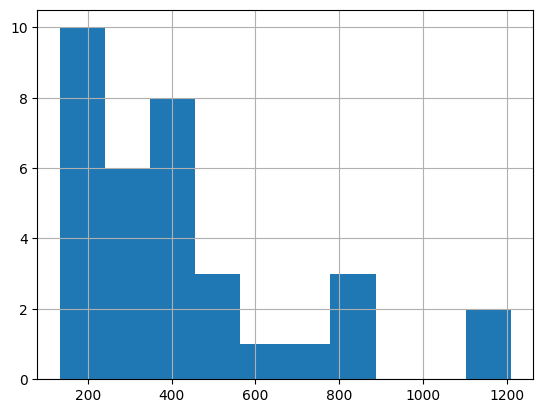

In [8]:
df["daily"].hist()

<Axes: >

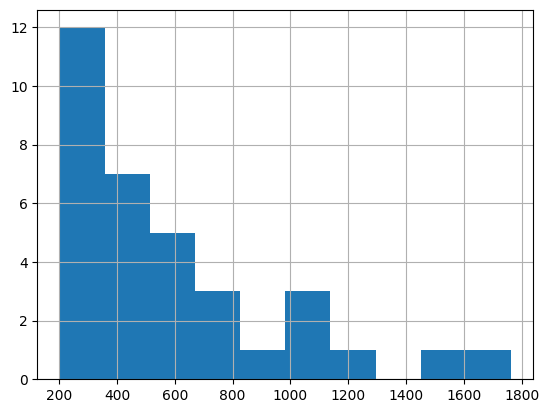

In [9]:
df["sunday"].hist()

In [10]:
df.drop("Newspaper",axis=1,inplace=True)

In [11]:
#Correlation
df.corr()

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


But in histogram you can see the data is right skewed.so we need to traform the data to make it normally distributed.We can do log transformation.

In [19]:
df['log_d']=np.log(df.daily)

In [22]:
df['log_s']=np.log(df.sunday)

In [23]:
df.head()

,daily,sunday,log_d,log_s
0,391.952,488.506,5.971139,6.191352
1,516.981,798.298,6.248006,6.682482
2,355.628,235.084,5.873885,5.459943
3,238.555,299.451,5.474600,5.701951
4,537.780,559.093,6.287450,6.326316


<Axes: ylabel='Frequency'>

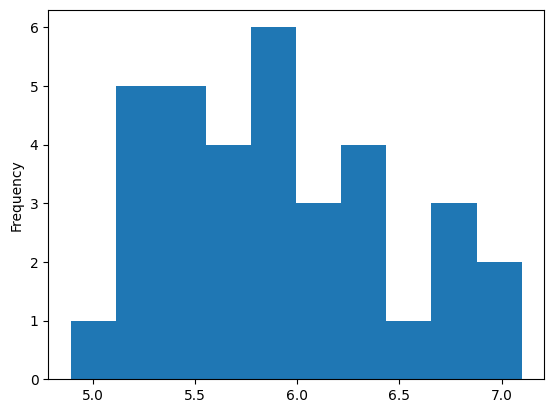

In [24]:
df.log_d.plot(kind="hist")

<Axes: ylabel='Frequency'>

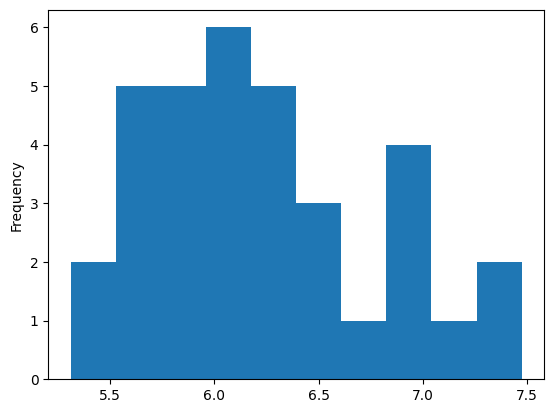

In [25]:
df.log_s.plot(kind="hist")

Now,the data is almost normally distributed.Let's find the correlation.

In [26]:
df.corr()

,daily,sunday,log_d,log_s
daily,1.000000,0.958154,0.956858,0.907117
sunday,0.958154,1.000000,0.901418,0.958406
log_d,0.956858,0.901418,1.000000,0.917881
log_s,0.907117,0.958406,0.917881,1.000000


In [35]:
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

<Axes: xlabel='daily', ylabel='Density'>

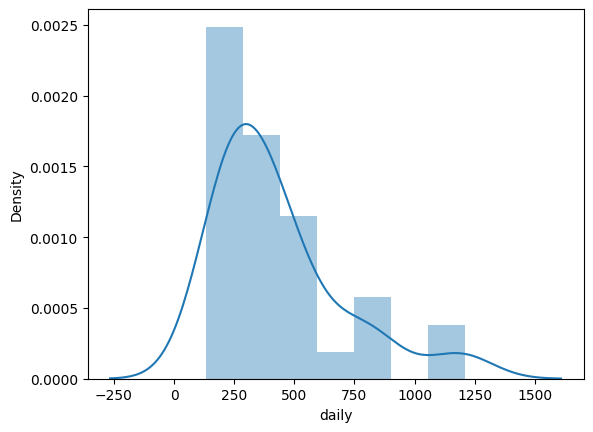

In [36]:
import seaborn as sns
sns.distplot(df['daily'])

<Axes: xlabel='sunday', ylabel='Density'>

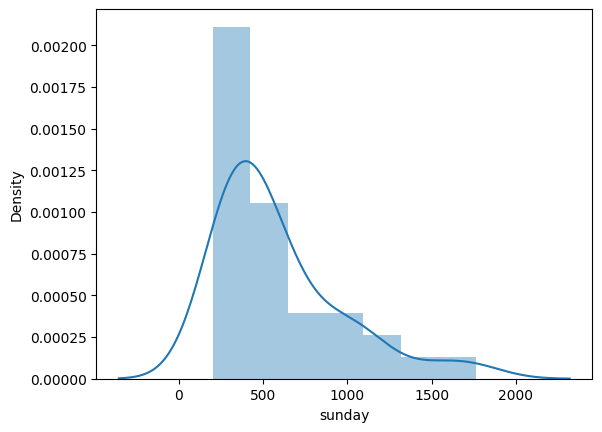

In [37]:
sns.distplot(df['sunday'])

In [30]:
import statsmodels.formula.api as smf
model1 = smf.ols("sunday~daily",data = df).fit()

In [31]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 sunday   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     358.5
Date:                Sat, 03 Aug 2024   Prob (F-statistic):           6.02e-19
Time:                        19:02:29   Log-Likelihood:                -206.85
No. Observations:                  34   AIC:                             417.7
Df Residuals:                      32   BIC:                             420.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.8356     35.804      0.386      0.702     -59.095      86.766
daily          1.3397      0.071     18.935      0.000       1.196       1.484
==============================================================================
Omnibus:                        3.297   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.192   Jarque-Bera (JB):                1.990
Skew:                           0.396   Prob(JB):                        0.370
Kurtosis:                       3.882   Cond. No.                         965.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Here,we got the line equation as Y=AX+B

i.e, sunday=1.339715(daily)+13.835630

We will try to analyse other models.,Let's build another model to find which model will give more accurate values.

In [38]:
import statsmodels.formula.api as smf
model2 = smf.ols("sunday~log_d",data = df).fit()

In [39]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 sunday   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     138.7
Date:                Sat, 03 Aug 2024   Prob (F-statistic):           3.58e-13
Time:                        19:09:30   Log-Likelihood:                -220.92
No. Observations:                  34   AIC:                             445.8
Df Residuals:                      32   BIC:                             448.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3038.9933    309.529     -9.818      0.000   -3669.483   -2408.504
log_d        614.3784     52.164     11.778      0.000     508.123     720.634
==============================================================================
Omnibus:                        3.158   Durbin-Watson:                   2.258
Prob(Omnibus):                  0.206   Jarque-Bera (JB):                1.970
Skew:                           0.550   Prob(JB):                        0.373
Kurtosis:                       3.425   Cond. No.                         66.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
import statsmodels.formula.api as smf
model3 = smf.ols("sunday~log_s",data = df).fit()

In [42]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 sunday   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     360.8
Date:                Sat, 03 Aug 2024   Prob (F-statistic):           5.47e-19
Time:                        19:13:14   Log-Likelihood:                -206.75
No. Observations:                  34   AIC:                             417.5
Df Residuals:                      32   BIC:                             420.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3435.9125    212.825    -16.144      0.000   -3869.422   -3002.403
log_s        647.3860     34.081     18.996      0.000     577.966     716.806
==============================================================================
Omnibus:                       16.591   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.070
Skew:                           1.475   Prob(JB):                     7.23e-05
Kurtosis:                       5.181   Cond. No.                         72.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
df.corr()

,daily,sunday,log_d,log_s
daily,1.000000,0.958154,0.956858,0.907117
sunday,0.958154,1.000000,0.901418,0.958406
log_d,0.956858,0.901418,1.000000,0.917881
log_s,0.907117,0.958406,0.917881,1.000000


In Model2 and Model3,we can see the correlation value is lesser tha Model1 and AIC,BIC values are less in Model1.So we can say Model1 is best among the 3 models.

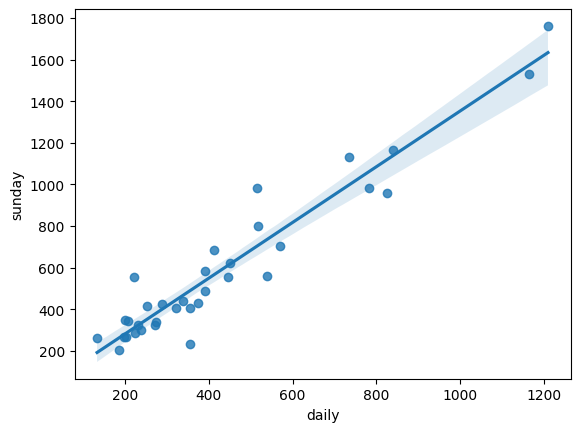

In [15]:
sns.regplot(x="daily", y="sunday", data=df);

In [34]:
model1.fittedvalues

0      538.939509
1      706.442705
2      490.275710
3      333.431284
4      734.307432
5      996.884826
6      280.213795
7      352.279731
8      290.090172
9      323.546868
10     616.379041
11     400.438457
12     262.668890
13    1573.783417
14     609.447357
15     566.965002
16     378.613164
17    1061.219269
18    1633.852208
19    1119.786239
20     313.594128
21     489.224034
22     704.489401
23     309.195844
24     466.219792
25     277.920203
26     192.337885
27     514.901007
28     380.708478
29     777.960698
30     538.047259
31     284.270451
32     444.722729
33    1137.725020
dtype: float64

These are the predicted values we got for the actual values in model1.